In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html
#http://matplotlib.org/examples/color/colormaps_reference.html
#https://stanford.edu/~mwaskom/software/seaborn/api.html

In [2]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=6, n_redundant=2, random_state=42)

In [3]:
X.shape

(1000, 10)

## Plotting with matplotlib.pyplot and seaborn

The easiest way for me to plot stuff is to make a figure:

In [4]:
fig = plt.figure()

This is just a figure object. It's going to be the picture that holds all the plots I want to add. I can add a plot with the add_subplot method

In [5]:
ax1 = fig.add_subplot(111)
ax1

Now `ax1` is an AxesSubplot object. It's going to be a plot that goes inside our figure object. Let's look at the add_subplot method. 
The `111` argument passed to the add_subplot says to divide the figure up into 1 row, with 1 column, and this plot will be in the first (and in this case) the only spot.

If I wanted two plots side by side I could call
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

like so



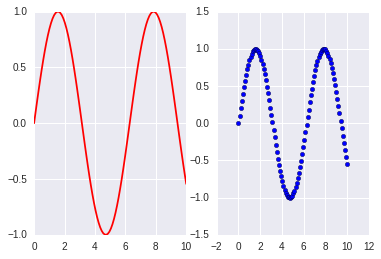

In [6]:
x = np.linspace(0,10,100)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(x, np.sin(x), c='r')
ax2 = fig.add_subplot(122)
ax2.scatter(x, np.sin(x), c='b')
plt.show()

The location of the plots are numbered starting at the upper left, then moving along all columns of the first row, then on to the second row, and so on.

For example, if I plot 4 subplots in a two by two grid, then the third plot (plotted in green below) will go in the first column of the second row.

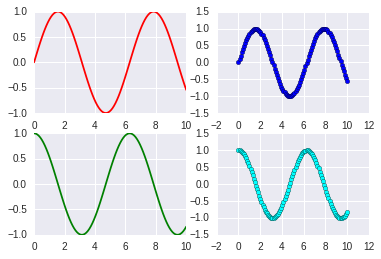

In [7]:
x = np.linspace(0,10,100)
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax1.plot(x, np.sin(x), c='r')

ax2 = fig.add_subplot(2,2,2)
ax2.scatter(x, np.sin(x), c='b')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(x, np.cos(x), c='g')

ax4 = fig.add_subplot(2,2,4)
ax4.scatter(x, np.cos(x), c='cyan')

plt.show()

I don't need to use different variables to store the subplots, but it helps to keep them separate in case I want different formatting for some

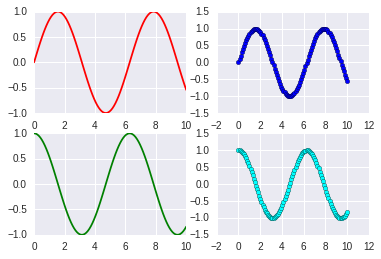

In [8]:
x = np.linspace(0,10,100)
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax1.plot(x, np.sin(x), c='r')

ax1 = fig.add_subplot(2,2,2)
ax1.scatter(x, np.sin(x), c='b')

ax1 = fig.add_subplot(2,2,3)
ax1 = plt.plot(x, np.cos(x), c='g')

ax1 = fig.add_subplot(2,2,4)
ax1 = plt.scatter(x, np.cos(x), c='cyan')

plt.show()

You can get even more fancy if you want. This specifies a 2 by 2 grid. `ax1` is in the upper left, a.k.a. 0,0 position, and spans two columns. `ax2` is in the bottom left, a.k.a 1,0 and `ax3` is in the lower right (1,1) position

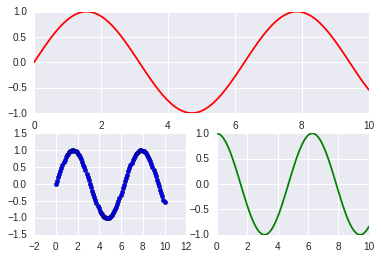

In [9]:
ax1 = plt.subplot2grid((2,2), (0,0), colspan=2)
ax2 = plt.subplot2grid((2,2), (1, 0))
ax3 = plt.subplot2grid((2,2), (1, 1))

ax1.plot(x, np.sin(x), c='r')


ax2.scatter(x, np.sin(x), c='b')


ax3.plot(x, np.cos(x), c='g')


If you want to plot things on top of each other, then use the same subplot

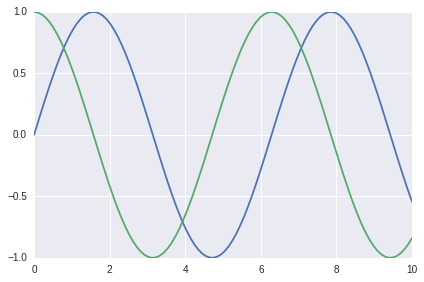

In [10]:
x=np.linspace(0,10,100)
fig=plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, np.sin(x))
ax1.plot(x, np.cos(x))
fig.tight_layout()
plt.show()

You can add labels to a plot to help keep things straight

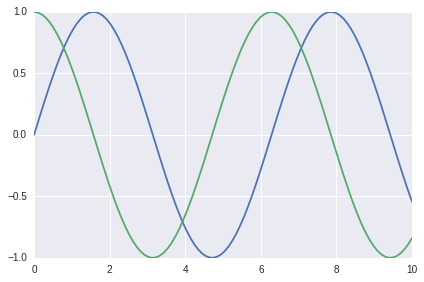

In [11]:
x=np.linspace(0,10,100)
fig=plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, np.sin(x), label='Sine')
ax1.plot(x, np.cos(x), label='Cosine')
fig.tight_layout()
plt.show()

But the labels won't show up, unless you add a legend

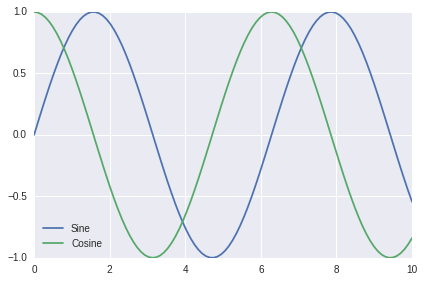

In [12]:
x=np.linspace(0,10,100)
fig=plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, np.sin(x), label='Sine')
ax1.plot(x, np.cos(x), label='Cosine')
fig.tight_layout()
plt.legend(loc='best')
plt.show()

Through the attributes and methods of the figure and the axes you can change pretty much every thing about how the plot looks. You just have to find it. Like below, to change the gridlines color I call `ax1.get_gridlines()` method. That gives me a list of gridlines. Then I loop through the list and use the `set_color()` method to change them all to black (which is `'k'` in matplotlib).

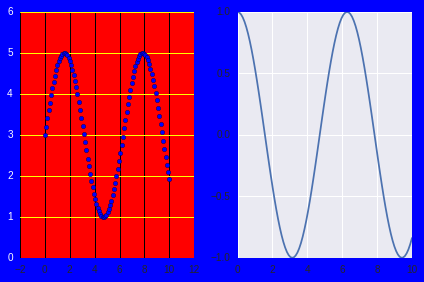

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.scatter(x, np.sin(x))
#ax1.set_xticklabels('a', color='magenta')
fig.set_facecolor('blue')
ax1.set_axis_bgcolor('red')
grid_lines = ax1.get_xgridlines()
for gl in grid_lines:
    gl.set_color('k')
y_grid_lines = ax1.get_ygridlines()
for gl in y_grid_lines:
    gl.set_color('yellow')
labels = [str(l) for l in xrange(len(ax1.get_yticklabels()))]
ax1.set_yticklabels(labels, color='white')
ax2 = fig.add_subplot(122)
ax2.plot(x, np.cos(x))
fig.tight_layout()
plt.show()

But Seaborn is a nice wrapper for matplotlib with a lot of different plot styles, and it usually looks pretty good.



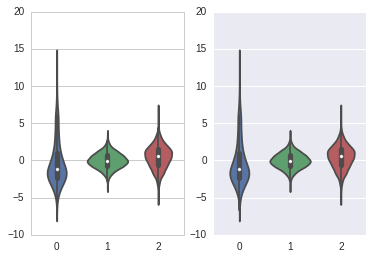

In [14]:
fig = plt.figure()
with sns.axes_style('whitegrid'):
    ax1 = fig.add_subplot(121)
    ax1 = sns.violinplot(data=X[:,1:4])
with sns.axes_style('darkgrid'):
    ax2 = fig.add_subplot(122)
    ax2 = sns.violinplot(data=X[:,1:4])
plt.show()


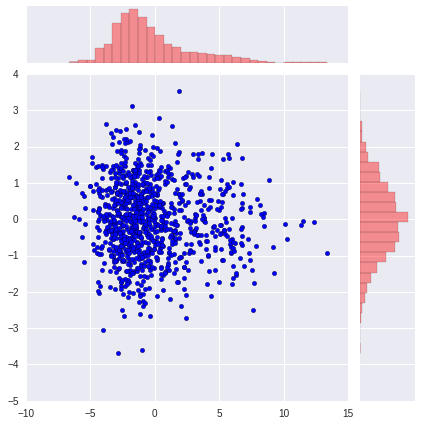

In [152]:
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
ax = sns.JointGrid(X[:,1], X[:,2])
#ax.plot_joint(plt.hexbin, cmap=plt.get_cmap('plasma'), gridsize=15)
ax.plot_marginals(sns.distplot, kde=False, color='red')
ax.plot_joint(plt.scatter)

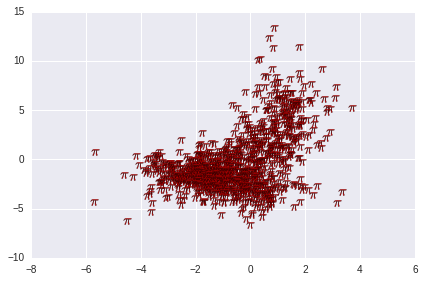

In [16]:
fig=plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x=X[:,0], y=X[:,1], marker='$\pi$', s=60, c='r')
fig.tight_layout()
plt.show()

Axes(0.125,0.125;0.775x0.775)


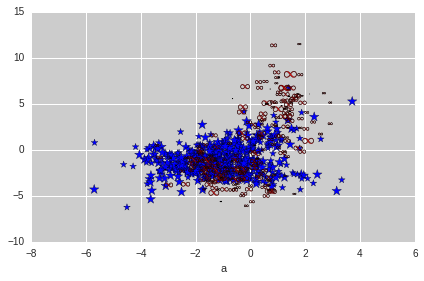

In [86]:
fig=plt.figure()

ax1=fig.add_subplot(111)
ax1.set_axis_bgcolor('0.8')
ax1.scatter(x=X[y==0][:,0], y=X[y==0][:,1],marker="*", c='b',s=50*(1+y))

ax2 = fig.add_subplot(111)
#ax2.set_axis_bgcolor("red")
ax2 = plt.scatter(x=X[y==1][:,0], y=X[y==1][:,1], marker='$\infty$', c='r',s=50*X[:,2])
for ax in fig.axes:
    print ax
    ax.set_xlabel('a')
    ax.grid
fig.tight_layout()
plt.show()

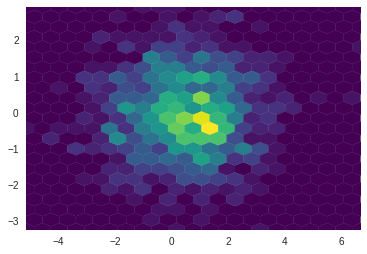

In [18]:
fig=plt.figure()
ax1 = fig.add_subplot(111)
ax1 = plt.hexbin(x=X[:,3], y=X[:,4],cmap=plt.get_cmap('viridis'),gridsize=20)

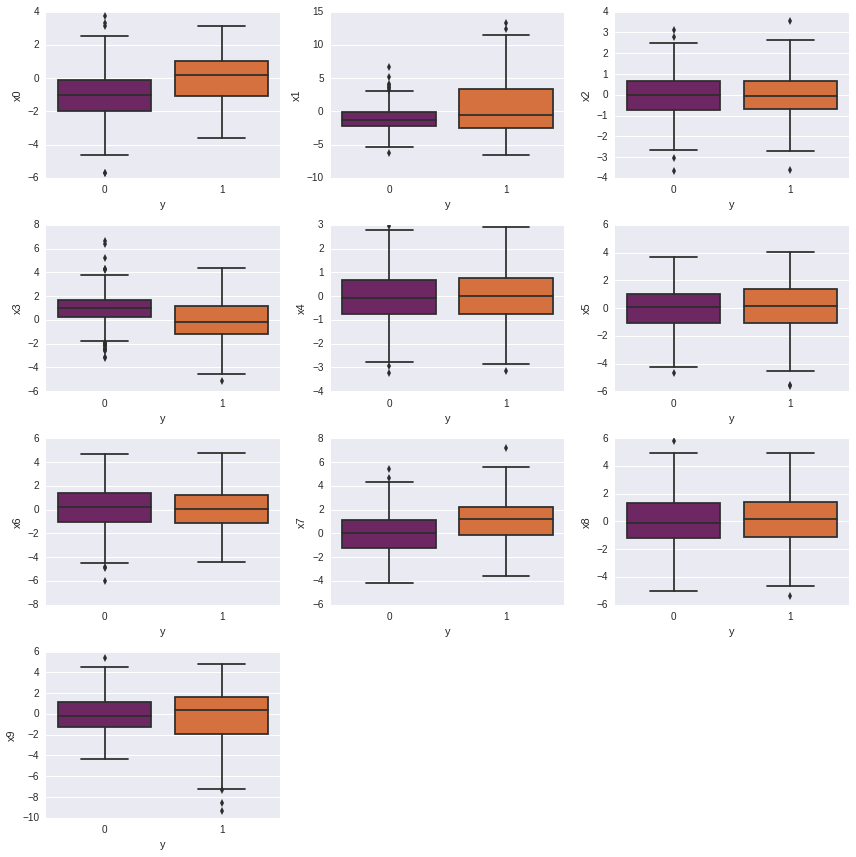

In [91]:
fig = plt.figure(figsize=(12,12))
for i in xrange(X.shape[1]):
    v = i+1
    a = fig.add_subplot(4,3,v)
    a = sns.boxplot(x=y, y=X[:,i], palette='inferno')
    a.set_xlabel("y")
    
    a.set_ylabel("x{}".format(i))
fig.tight_layout()
plt.show()

In [20]:
df = pd.DataFrame(X)
cols = ['x_{}'.format(x) for x in df.columns]
df.columns = cols
df['target'] = y

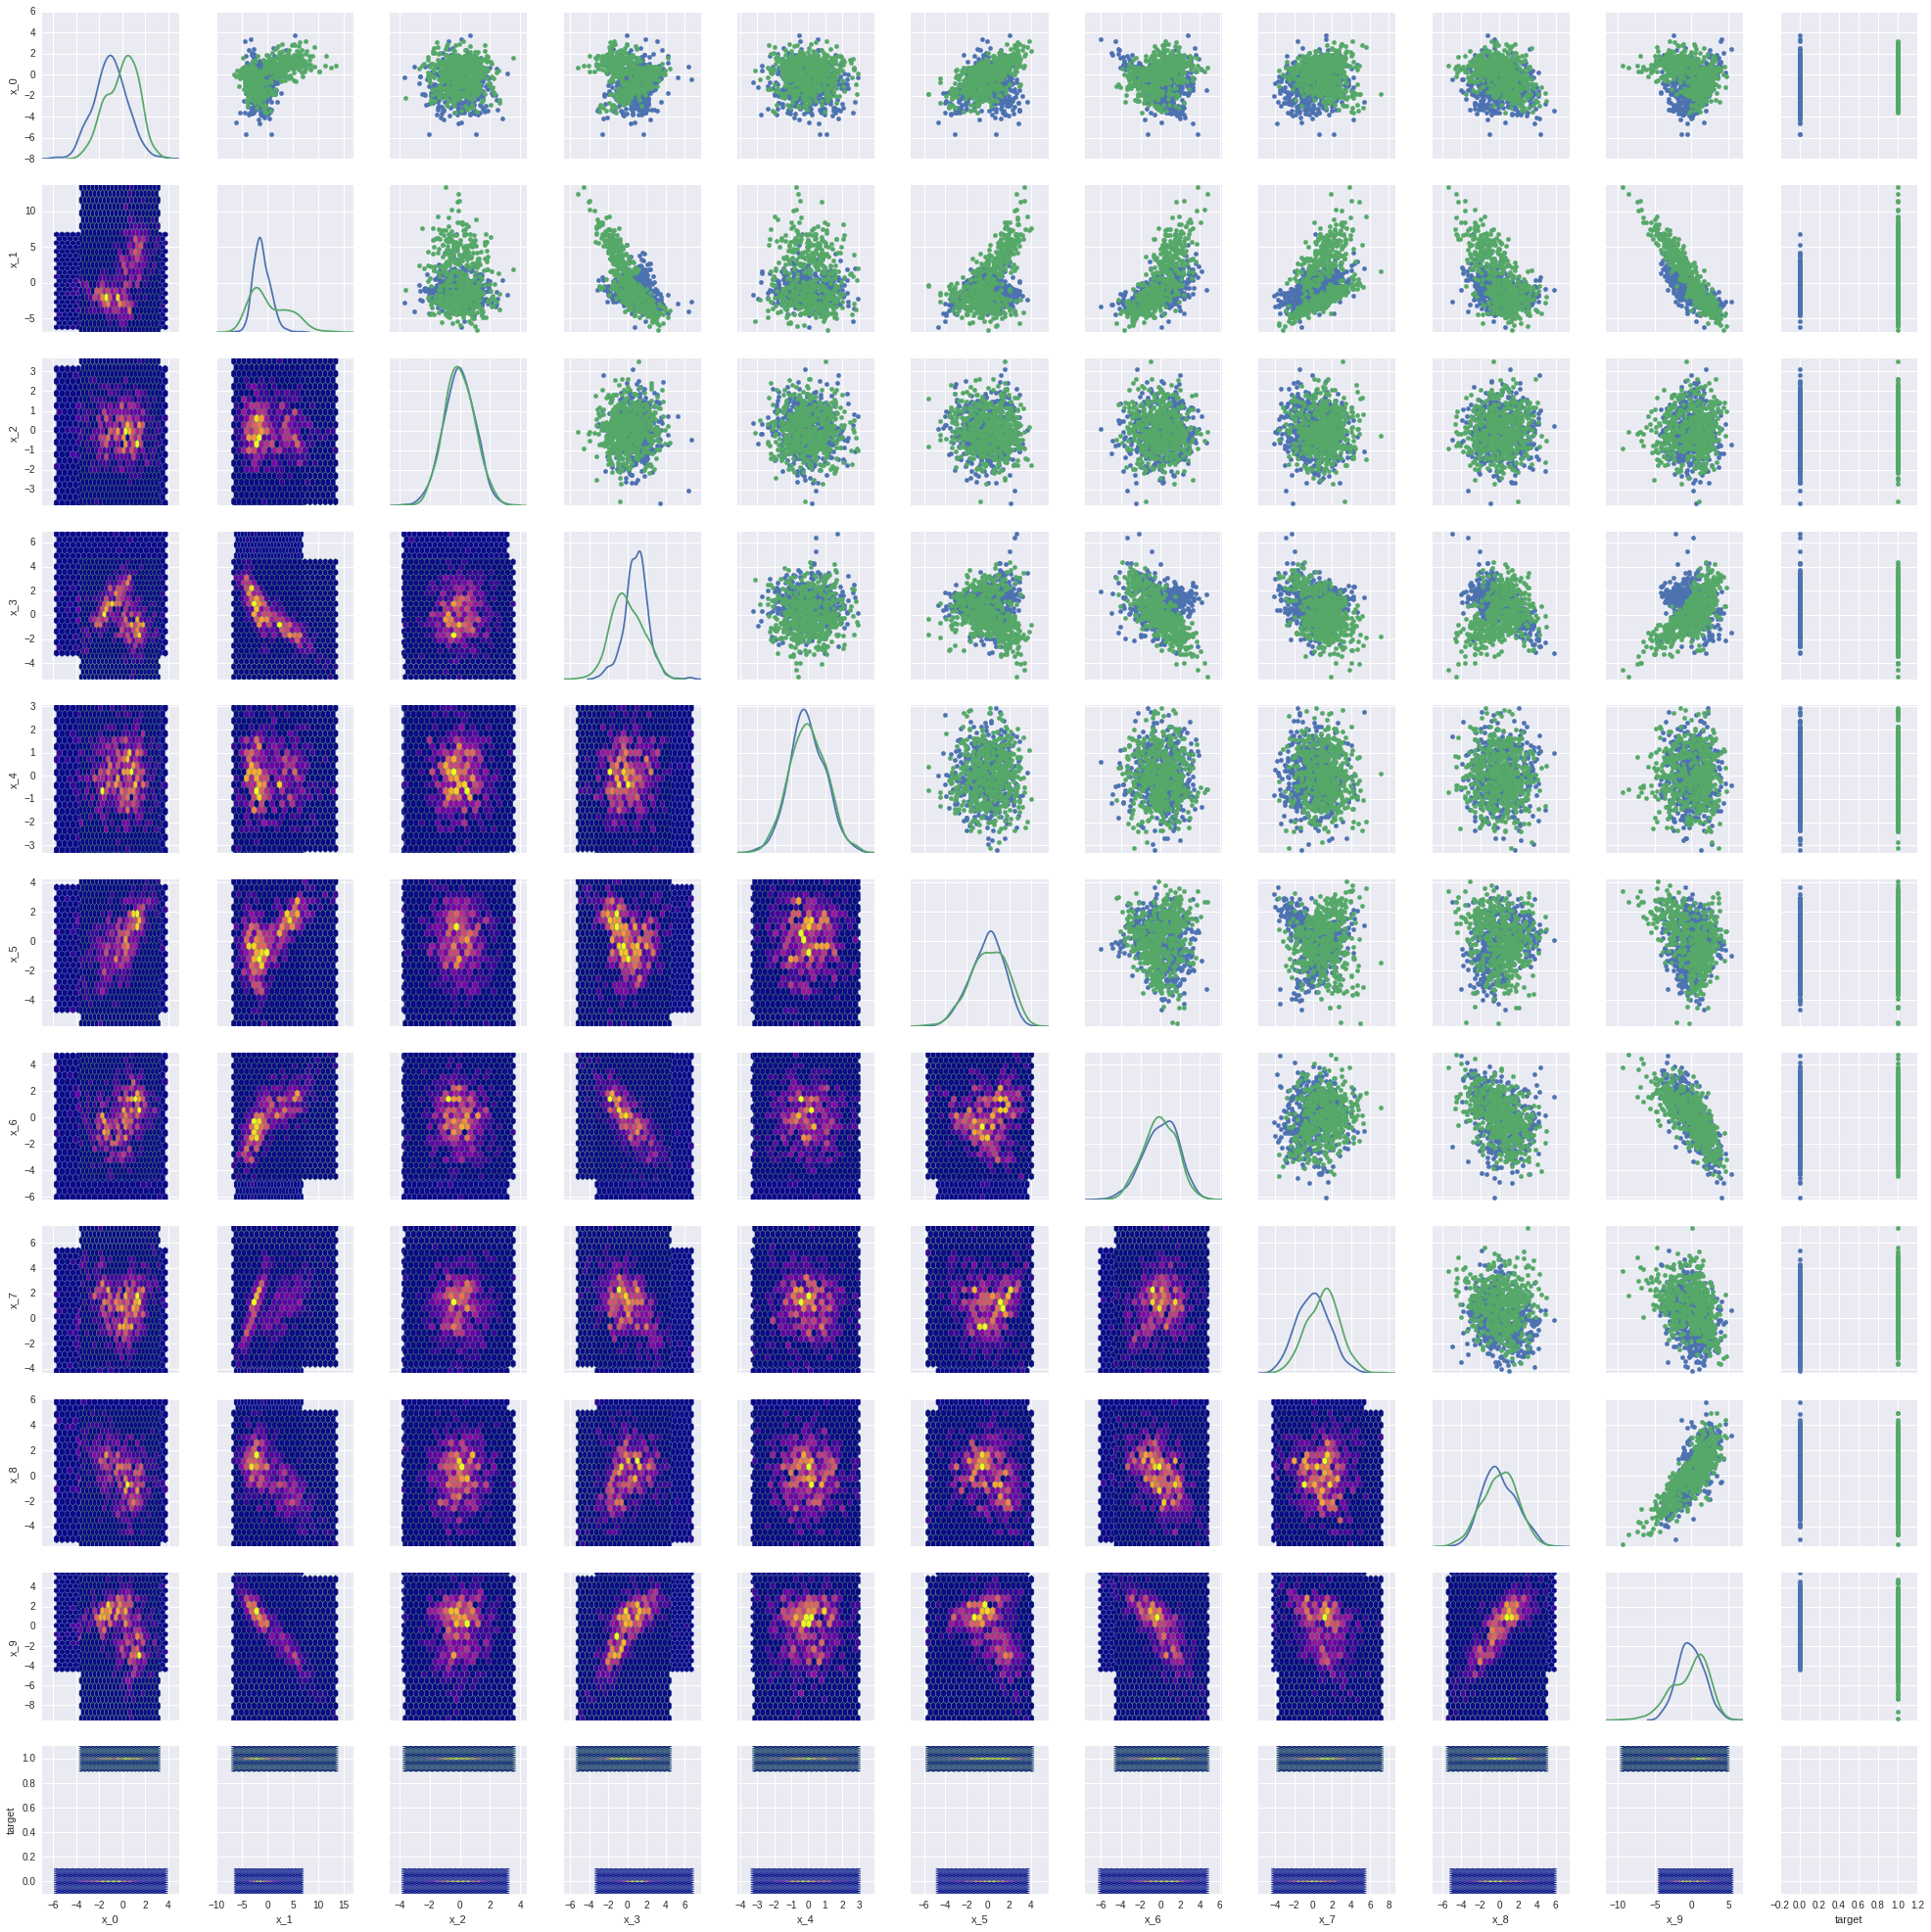

In [21]:
g = sns.PairGrid(df, hue='target')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)
g.map_lower(plt.hexbin, cmap=plt.get_cmap('plasma'),gridsize=20)
plt.tight_layout()
plt.show()

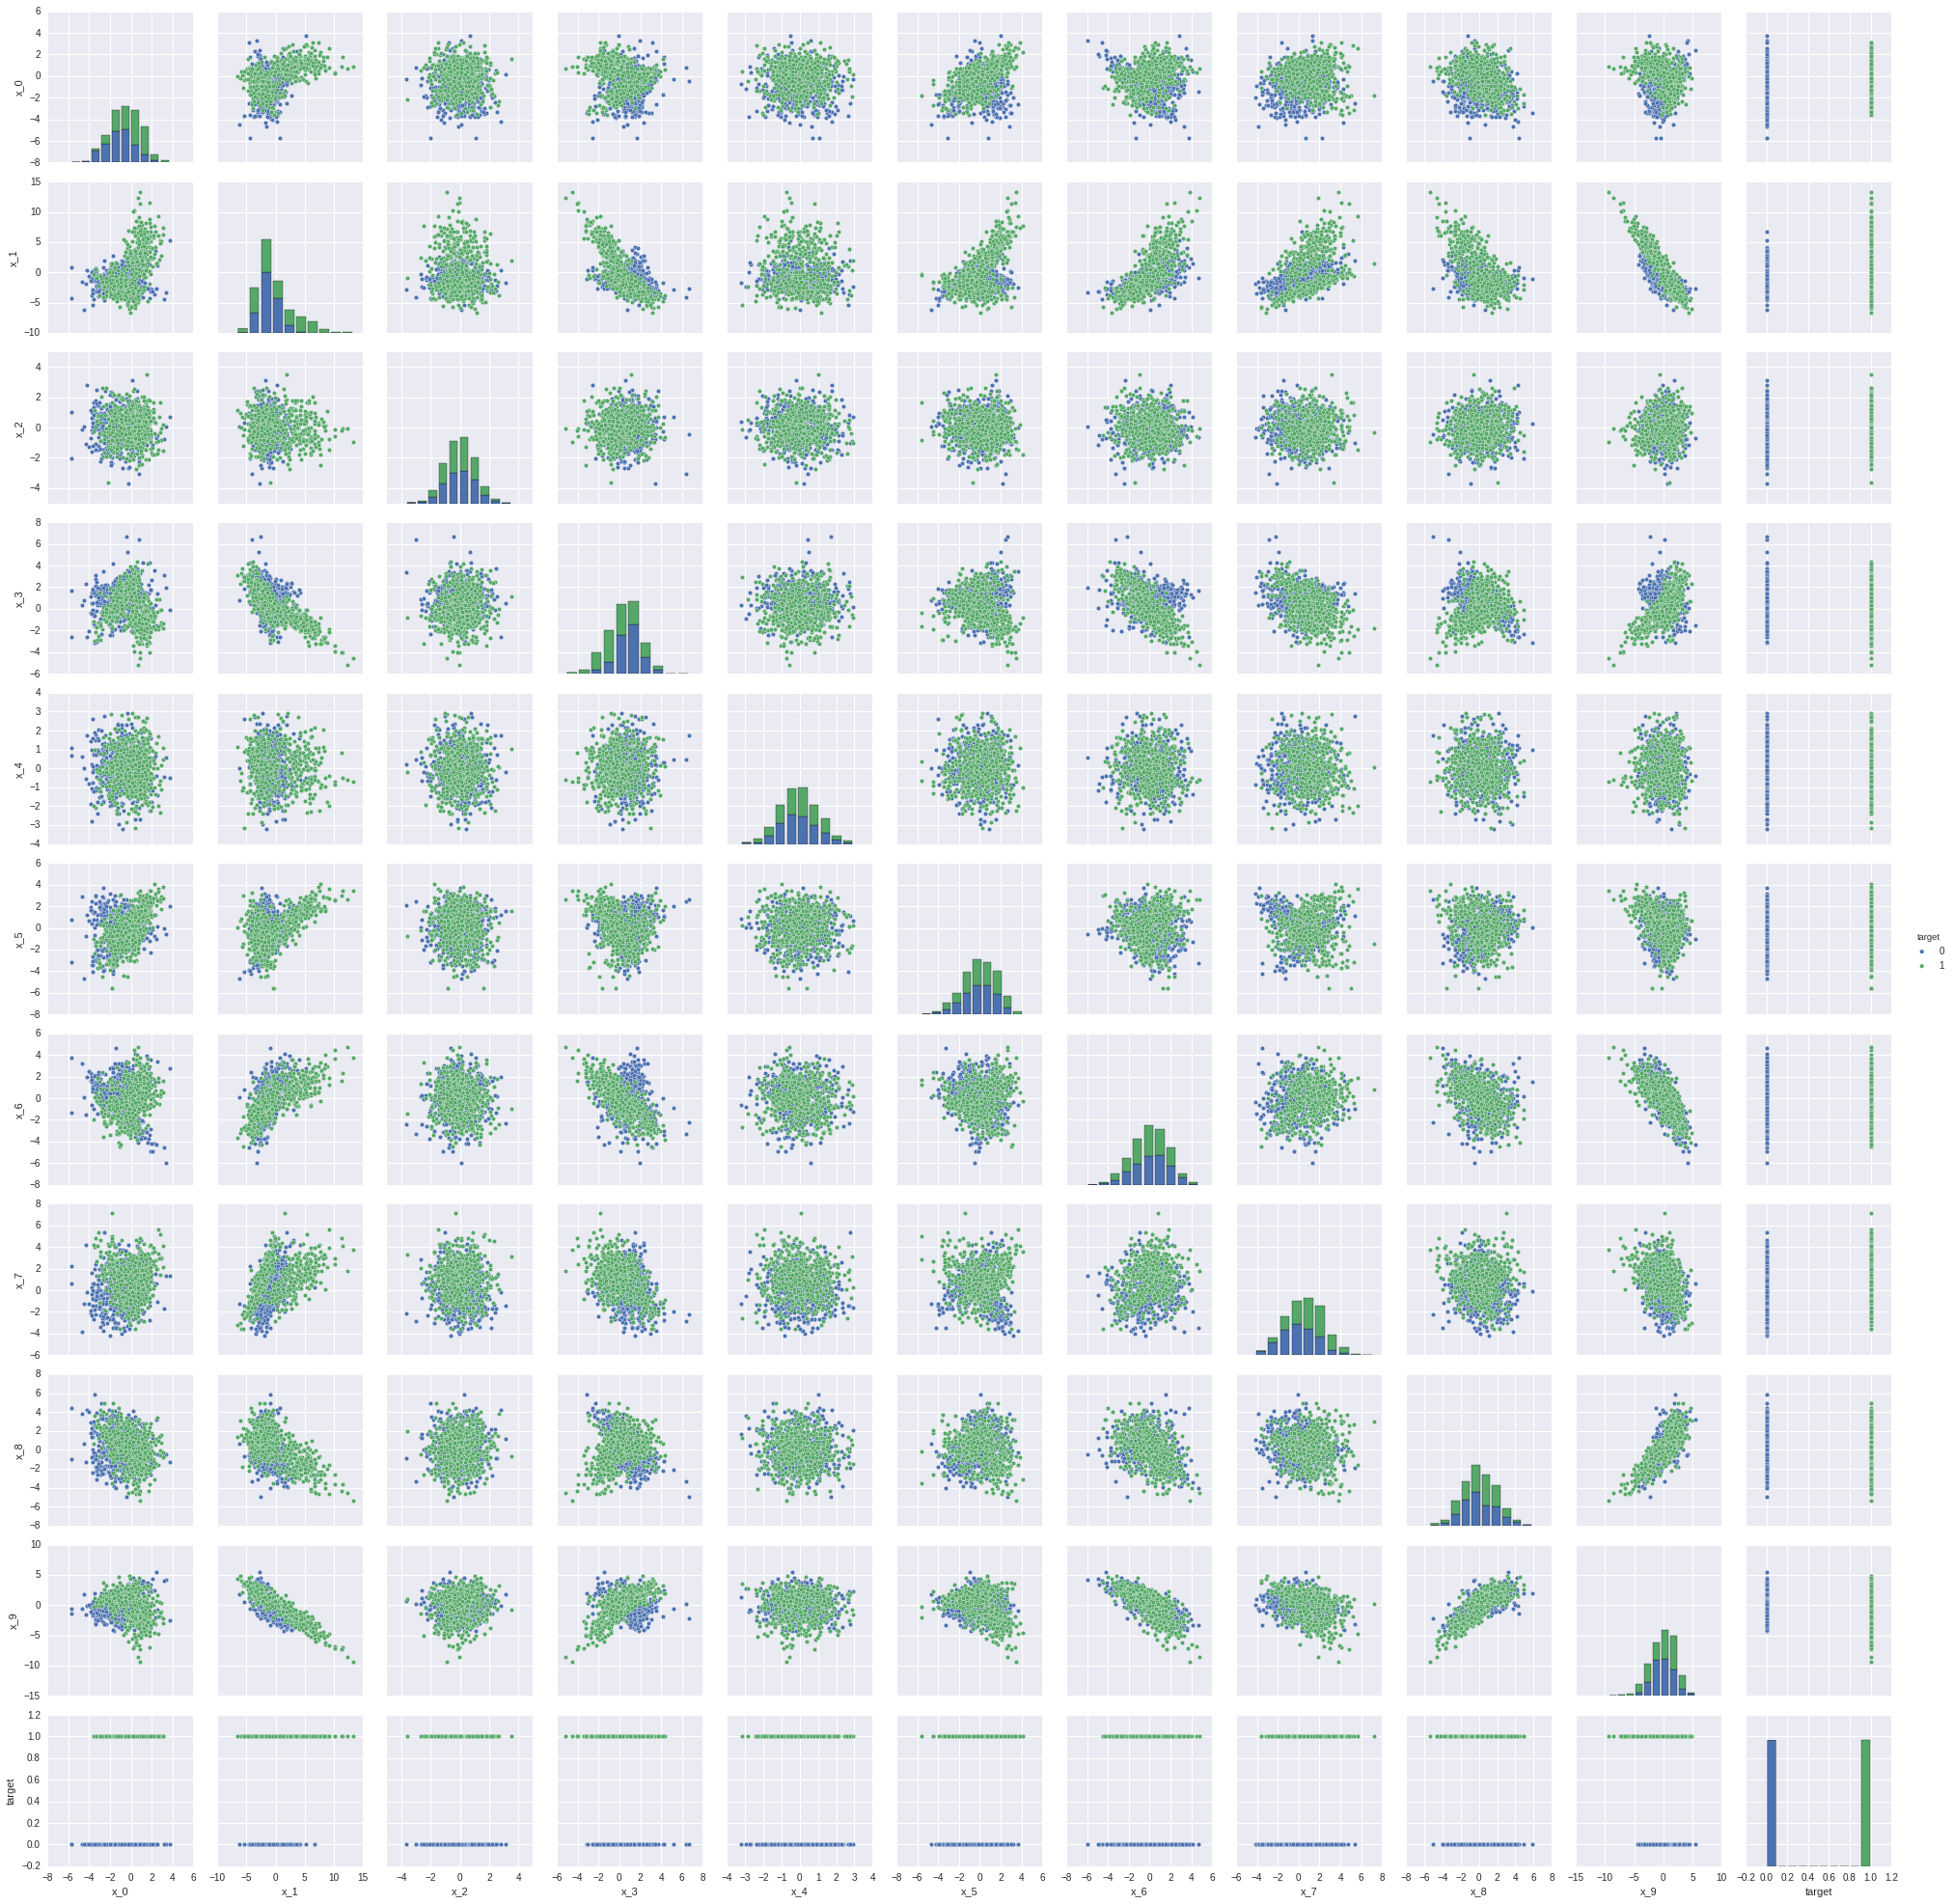

In [22]:
g = sns.pairplot(df, hue='target')

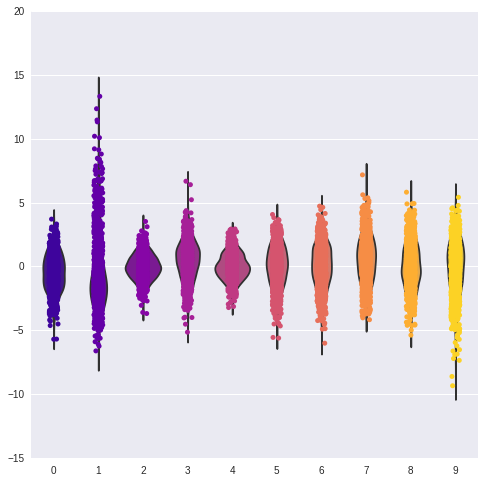

In [89]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
ax1 = sns.violinplot(data=X, palette='plasma', normed=1, inner=None)
ax1 = sns.stripplot(data=X, jitter=True, palette='plasma')

In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [25]:
rf = RandomForestClassifier()

In [26]:
from sklearn.cross_validation import train_test_split, KFold

In [27]:
X_train, X_test, y_train, t_test = train_test_split(X, y, test_size=.2, random_state=42)

In [28]:
k_folds = KFold(X_train.shape[0], n_folds=5, shuffle=True)

In [29]:
from sklearn.metrics import precision_score, recall_score, roc_curve

In [30]:
recall_scores = []
precision_scores = []
for train_index, test_index in k_folds:
    model = rf.fit(X_train[train_index], y_train[train_index])
    y_preds = rf.predict(X_train[test_index])
    precision_scores.append(precision_score(y_train[test_index], y_preds))
    recall_scores.append(recall_score(y_train[test_index], y_preds))

    

In [31]:
print recall_scores

[0.78947368421052633, 0.8314606741573034, 0.88888888888888884, 0.78749999999999998, 0.898876404494382]


In [32]:
print precision_scores

[0.89552238805970152, 0.87058823529411766, 0.91428571428571426, 0.83999999999999997, 0.87912087912087911]


In [33]:
from sklearn.pipeline import Pipeline
from sklearn import grid_search

In [34]:
gb = GradientBoostingClassifier()

In [35]:
rf_params = {'max_features': [5, 6, 7, 'sqrt'], 'n_estimators':[10, 50, 100], 'class_weight':['balanced', 'balanced_subsample'], 'n_jobs':[-1]}
gb_params = {'n_estimators':[50,75,100,150], 'learning_rate':[.01, 0.05, 0.1], 'max_depth':[1, 3, 5], 'max_features':[5, 10, 'sqrt']}

In [36]:
model_rf = grid_search.GridSearchCV(rf, rf_params, cv=5, scoring='f1', refit=True)

In [37]:
model_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [5, 6, 7, 'sqrt'], 'n_estimators': [10, 50, 100], 'n_jobs': [-1], 'class_weight': ['balanced', 'balanced_subsample']},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [38]:
model_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=7,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
print model_rf.best_params_
print model_rf.best_score_

{'max_features': 7, 'n_estimators': 100, 'n_jobs': -1, 'class_weight': 'balanced'}
0.909168413822


In [40]:
model_gb = grid_search.GridSearchCV(gb, gb_params, cv=5, scoring='f1', refit=True)

In [41]:
model_gb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 75, 100, 150], 'max_features': [5, 10, 'sqrt'], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [42]:
print model_gb.best_params_
print model_gb.best_score_

{'max_features': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}
0.913564304686


In [43]:
print "GB Scores"
print "Recall is {}".format(recall_score(model_gb.predict(X_test), t_test))
print "Precision is {}".format(precision_score(model_gb.predict(X_test), t_test))
print "*"*50
print "RF Scores"
print "Recall is {}".format(recall_score(model_rf.predict(X_test), t_test))
print "Precision is {}".format(precision_score(model_rf.predict(X_test), t_test))

GB Scores
Recall is 0.862745098039
Precision is 0.926315789474
**************************************************
RF Scores
Recall is 0.839622641509
Precision is 0.936842105263


In [44]:
gb_fpr, gb_tpr, gb_thresholds = roc_curve(t_test, model_gb.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(t_test, model_rf.predict(X_test))

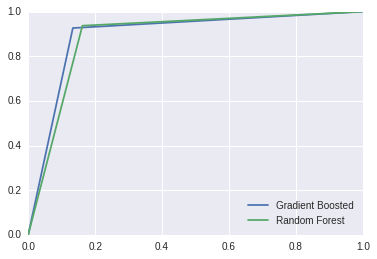

In [45]:
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosted')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.legend(loc='best')
plt.show()

In [46]:
rf_tpr

array([ 0.        ,  0.93684211,  1.        ])

In [47]:
t_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [48]:
model_gb.predict(X_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [49]:
model_gb.estimator.fit(X_test, t_test)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [50]:
gb_feats = np.argsort(model_gb.estimator.feature_importances_)[::-1]

In [51]:
gb_names = df.columns[:-1][gb_feats]

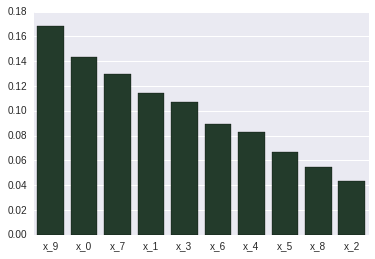

In [52]:
sns.barplot(x=gb_names, y=model_gb.estimator.feature_importances_[gb_feats], color='#1f3f2a')

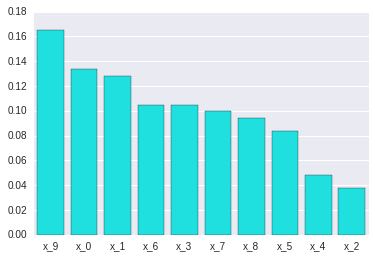

In [54]:
model_rf.predict(X_test)
model_rf.estimator.fit(X_test, t_test)
rf_feats = np.argsort(model_rf.estimator.feature_importances_)[::-1]
rf_names = df.columns[:-1][rf_feats]
sns.barplot(x=rf_names, y=model_rf.estimator.feature_importances_[rf_feats], color='cyan')

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier?

In [57]:
knn = KNeighborsClassifier(n_jobs=-1)

In [77]:
kn_params = {'algorithm':['ball_tree', 'kd_tree'], 'p':[1, 2, 3,4], 'n_neighbors':[3,5,7,9]}

In [78]:
kn_model = grid_search.GridSearchCV(knn, param_grid=kn_params, cv=5, 
                                    scoring='f1', refit=True, n_jobs=-1)

In [79]:
kn_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'p': [1, 2, 3, 4], 'algorithm': ['ball_tree', 'kd_tree'], 'n_neighbors': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [80]:
print kn_model.best_params_
print kn_model.best_score_

{'n_neighbors': 9, 'algorithm': 'ball_tree', 'p': 3}
0.918095486339


In [81]:
kn_fpr, kn_tpr, kn_thresholds = roc_curve(t_test, kn_model.predict(X_test))

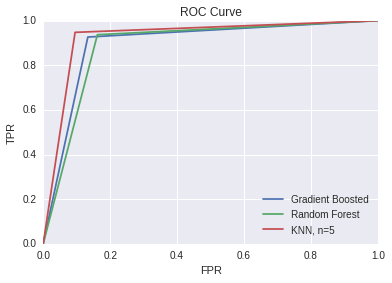

In [82]:
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosted')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(kn_fpr, kn_tpr, label='KNN, n=5')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.legend(loc='best')
plt.show()

In [76]:
print "GB Scores"
print "Recall is {}".format(recall_score(model_gb.predict(X_test), t_test))
print "Precision is {}".format(precision_score(model_gb.predict(X_test), t_test))
print "*"*50
print "RF Scores"
print "Recall is {}".format(recall_score(model_rf.predict(X_test), t_test))
print "Precision is {}".format(precision_score(model_rf.predict(X_test), t_test))
print "*"*50
print "KNN Scores"
print "Recall is {}".format(recall_score(kn_model.predict(X_test), t_test))
print "Precision is {}".format(precision_score(kn_model.predict(X_test), t_test))

GB Scores
Recall is 0.862745098039
Precision is 0.926315789474
**************************************************
RF Scores
Recall is 0.839622641509
Precision is 0.936842105263
**************************************************
KNN Scores
Recall is 0.881188118812
Precision is 0.936842105263


In [95]:
cmap_test = plt.cm.viridis

In [97]:
cmap_test.N

256

In [99]:
cmaplist= [cmap_test(i) for i in xrange(cmap_test.N)]

In [102]:
bounds = np.linspace(0,20,21)
print bounds

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.]


In [104]:
from matplotlib.colors import BoundaryNorm
norm = BoundaryNorm(bounds, cmap_test.N)

In [107]:
tag = np.random.randint(0,20, size=X.shape[0])

0.125 0.9
Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.9)


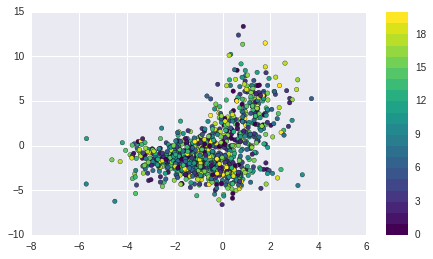

In [169]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x=X[:,0], y=X[:,1], c=tag, cmap=cmap_test, norm=norm)
p1 = ax1.get_position()
print p1.x0, p1.x1
print p1
ax2 = fig.add_axes([1.05*p1.x1, p1.y0, p1.width/15, p1.height])
cb = ColorbarBase(ax2, cmap=cmap_test, norm=norm)

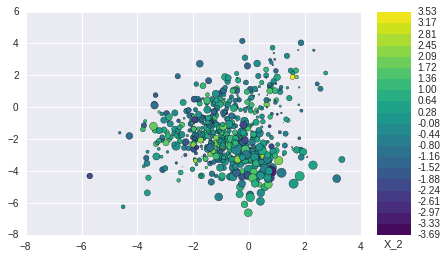

In [181]:
from matplotlib.colorbar import ColorbarBase
alphas = np.abs(np.true_divide(X[:,4], np.max(X[:,4])))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x=X[:,0], y=X[:,1], c=X[:,2], s=20*X[:,3],cmap=cmap_test)
p= ax.get_position()
ax2 = fig.add_axes([p.x0+(1.05*p.width), p.x0, p.width/10, p.height])
ax2.set_xlabel('X_2')
ticks = np.linspace(X[:,2].min(), X[:,2].max(), 21)
cb = ColorbarBase(ax2,cmap=cmap_test, boundaries=ticks, ticks=ticks, format="%.2f")

In [175]:
X[:,4]

array([ -1.23647829e+00,   1.10173786e+00,   1.29914982e+00,
         1.39025533e+00,  -4.94190023e-01,   7.09410981e-01,
        -6.08493904e-01,   5.00917329e-01,  -4.77839851e-01,
        -2.16523198e-01,  -1.20435530e-02,   8.10027239e-01,
        -6.32739599e-02,   8.13280406e-01,   8.55947039e-02,
         3.46117329e-01,  -8.22536997e-02,  -3.67784527e-01,
         9.57304823e-01,   3.63004285e-01,  -6.29220673e-01,
        -2.00201254e-01,  -1.57943630e+00,   2.36223646e-01,
        -1.71767215e+00,   2.23926874e-01,  -7.42386370e-01,
         1.58756051e-01,   5.37412003e-01,  -1.25656534e+00,
         1.01593722e+00,   8.64248385e-01,  -1.72918289e+00,
         1.60535596e+00,  -1.75686870e+00,   3.34327055e-01,
         5.05557853e-01,   8.72153106e-01,   7.29819362e-01,
         4.38287995e-02,  -5.10663203e-03,   8.51591046e-01,
         1.74458387e+00,   1.05672491e+00,   1.43642952e+00,
         3.26994513e-01,  -3.86322475e-01,   4.22434973e-01,
        -2.21781404e-01,